图片的显示与读写操作
===

# 1.减色处理
这里我们将图像的值由$256^3$压缩至$4^3$，即将RGB的值只取$\{32, 96, 160, 224\}$。这被称作色彩量化。具体定义如下:
$$
\begin{cases}
32 & 0 \leq val < 64 \\
96 & 64 \leq val < 128 \\
160 & 128 \leq val < 192 \\
224 & 192 \leq val < 256
\end{cases}
$$

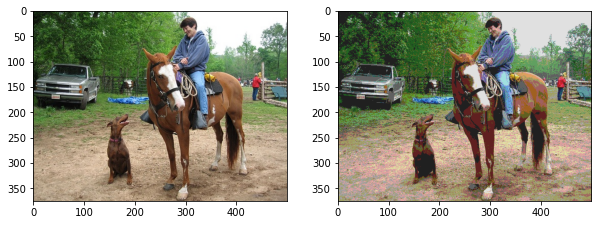

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("data/02.jpg")

out = (img // 64) * 64 + 32

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)

# 2.平均池化
将图片按照固定大小网格分割，网格内的像素值取网格内所有像素的平均值。我们将这种把图片使用均等大小网格分割，并求网格内代表值的操作称为池化(Pooling)

池化操作是卷积神经网络(Convolutional Neural Network)中重要的图像处理方式。平均池化按照下式定义：
$$v = \frac{1}{|R|} \times Sum_{i \in R}v_i$$

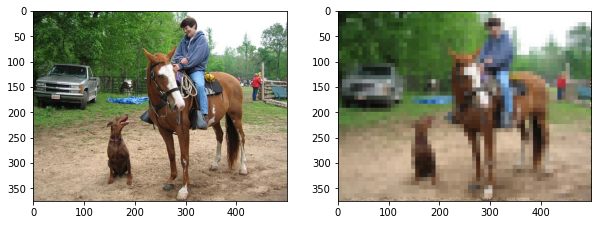

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/02.jpg")
out = img.copy()

H,W,C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)
for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.mean(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)

# 3.最大池化
网格内的值不取平均值，而是取网格内的最大值进行池化操作

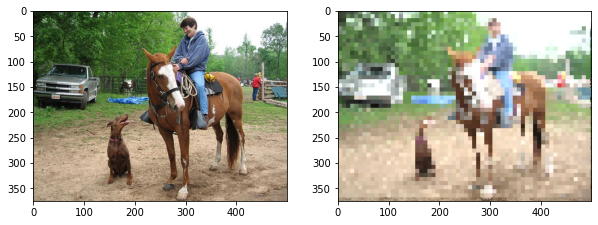

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/02.jpg")
out = img.copy()

H,W,C = img.shape
G = 8
Nh = int(H/G)
Nw = int(W/G)
for y in range(Nh):
    for x in range(Nw):
        for c in range(C):
            out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)



# 4.伽玛矫正

伽马校正用来对照相机等电子设备传感器的非线性光电转换特性进行校正。如果图像原样显示在显示器等上，画面就会显得很暗。伽马校正通过预先增大RGB的值来排除显示器的影响，达到对图像修正的目的。由于$x'=cI_{in}^g$引起非线性变换，在该式中，$x$被归一化，限定在$[0,1]$范围内。$c$是常数，$g$为伽马变量（通常取2.2），因此，使用下面的式子进行伽马校正
$$I_{out} ={\frac{1}{c}I_{in}}^{\frac{1}{g}}$$

| 显示屏上的图像显示 | $\gamma$修正值|
| --------------- | ------------ |
| ![images](Images/01_001.jpg) | ![images](Images/01_002.jpg) |

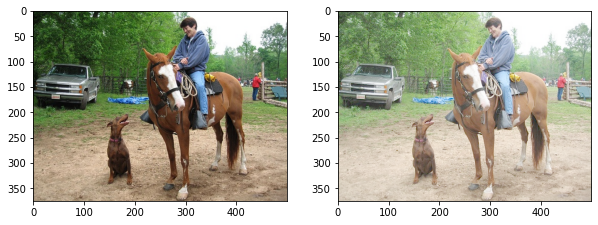

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("data/02.jpg")

out = img.astype(np.float).copy()
out /= 255.
out = (1/1 * out) ** (1/2.2)
out *= 255
out = out.astype(np.uint8)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
plt.imshow(show_img2)


